In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load the datasets
df_pessoas_final = pd.read_csv('../Data/df_pessoas_final.csv')

In [3]:
df_pessoas_final.head()

,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_afastado_trab_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,peso.pes,classe_renda
0,268503,2351897,2,4,3,1.0,2.0,1,2,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563277716385694,0.0
1,268503,2578989,2,15,3,1.0,1.0,1,2,1.0,...,-1.0,-1.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,563277716385694,0.0
2,268503,3312847,2,13,3,1.0,1.0,1,2,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563277716385694,0.0
3,268503,10482075,2,38,1,1.0,2.0,1,2,1.0,...,4.0,1.0,1.0,-1.0,1.0,6.0,1.0,12.0,563277716385694,0.0
4,2888440,5553031,2,5,3,4.0,2.0,1,2,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563263195326236,0.0


In [4]:
df_pessoas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254997 entries, 0 to 254996
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id_familia                        254997 non-null  int64  
 1   id_pessoa                         254997 non-null  int64  
 2   cod_sexo_pessoa                   254997 non-null  int64  
 3   idade                             254997 non-null  int64  
 4   cod_parentesco_rf_pessoa          254997 non-null  int64  
 5   cod_raca_cor_pessoa               254997 non-null  float64
 6   cod_local_nascimento_pessoa       254997 non-null  float64
 7   cod_certidao_registrada_pessoa    254997 non-null  int64  
 8   cod_deficiencia_memb              254997 non-null  int64  
 9   cod_sabe_ler_escrever_memb        254997 non-null  float64
 10  ind_frequenta_escola_memb         254997 non-null  float64
 11  cod_escola_local_memb             254997 non-null  f

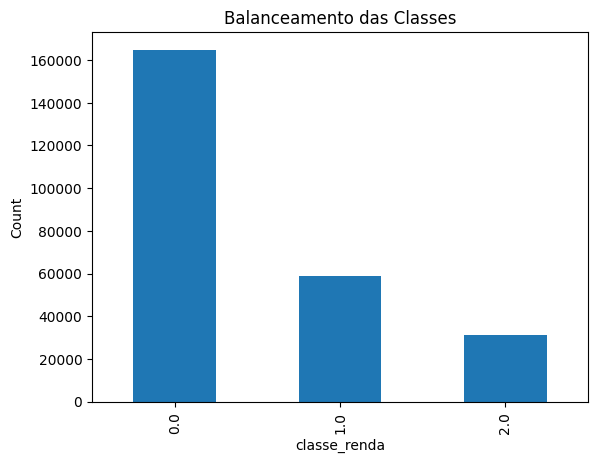

In [5]:
# Gráfico de barras para verificar balanceamento das classes
df_pessoas_final['classe_renda'].value_counts().plot(kind='bar')
plt.xlabel('classe_renda')
plt.ylabel('Count')
plt.title('Balanceamento das Classes')
plt.show()

In [6]:
# Verificar a contagem de valores únicos na coluna 'cod_parentesco_rf_pessoa'
print(df_pessoas_final['cod_parentesco_rf_pessoa'].value_counts())

cod_parentesco_rf_pessoa
3     113242
1      96502
2      31339
5       6080
6       2355
8       2149
10      2092
4        595
11       351
9        197
7         95
Name: count, dtype: int64


In [7]:
# Filtrar o dataframe por Responsável Familiar
df_pessoas_final_rf = df_pessoas_final[df_pessoas_final['cod_parentesco_rf_pessoa'] == 1]

# Visualizar as primeiras linhas do dataframe filtrado
df_pessoas_final_rf.head()


,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_afastado_trab_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,peso.pes,classe_renda
3,268503,10482075,2,38,1,1.0,2.0,1,2,1.0,...,4.0,1.0,1.0,-1.0,1.0,6.0,1.0,12.0,563277716385694,0.0
5,2888440,8540843,2,27,1,4.0,1.0,1,2,1.0,...,1.0,2.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,563263195326236,0.0
7,2113517,2667228,2,46,1,4.0,1.0,1,2,1.0,...,4.0,1.0,1.0,-1.0,2.0,6.0,1.0,12.0,563229587638739,2.0
9,4419096,4471735,2,34,1,1.0,1.0,1,2,1.0,...,3.0,1.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,563276393161791,0.0
10,4241219,7097369,2,56,1,4.0,2.0,1,2,1.0,...,6.0,2.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,56328235405831,0.0


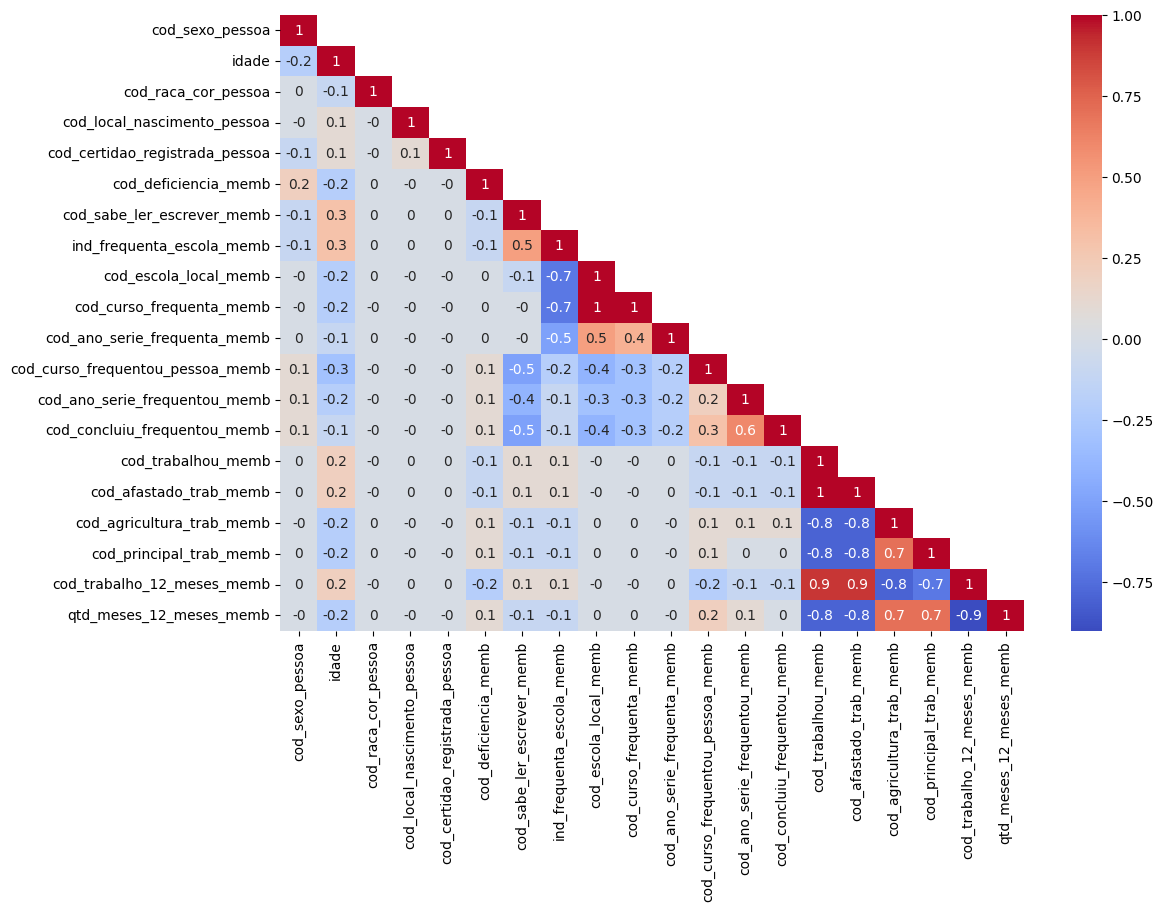

In [8]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_pessoas_final_rf[['cod_sexo_pessoa', 'idade',
      'cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_afastado_trab_memb', 'cod_agricultura_trab_memb',
       'cod_principal_trab_memb', 'cod_trabalho_12_meses_memb',
       'qtd_meses_12_meses_memb']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [9]:
#Retirando features com correlação > 8
df_pessoas_final_rf = df_pessoas_final_rf.drop(columns=['cod_afastado_trab_memb', 'qtd_meses_12_meses_memb'])
                                               
df_pessoas_final_rf.head()

,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_ano_serie_frequenta_memb,cod_curso_frequentou_pessoa_memb,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,peso.pes,classe_renda
3,268503,10482075,2,38,1,1.0,2.0,1,2,1.0,...,-1.0,4.0,4.0,1.0,1.0,1.0,6.0,1.0,563277716385694,0.0
5,2888440,8540843,2,27,1,4.0,1.0,1,2,1.0,...,-1.0,8.0,1.0,2.0,2.0,-1.0,-1.0,2.0,563263195326236,0.0
7,2113517,2667228,2,46,1,4.0,1.0,1,2,1.0,...,-1.0,4.0,4.0,1.0,1.0,2.0,6.0,1.0,563229587638739,2.0
9,4419096,4471735,2,34,1,1.0,1.0,1,2,1.0,...,-1.0,8.0,3.0,1.0,2.0,-1.0,-1.0,2.0,563276393161791,0.0
10,4241219,7097369,2,56,1,4.0,2.0,1,2,1.0,...,-1.0,5.0,6.0,2.0,2.0,-1.0,-1.0,2.0,56328235405831,0.0


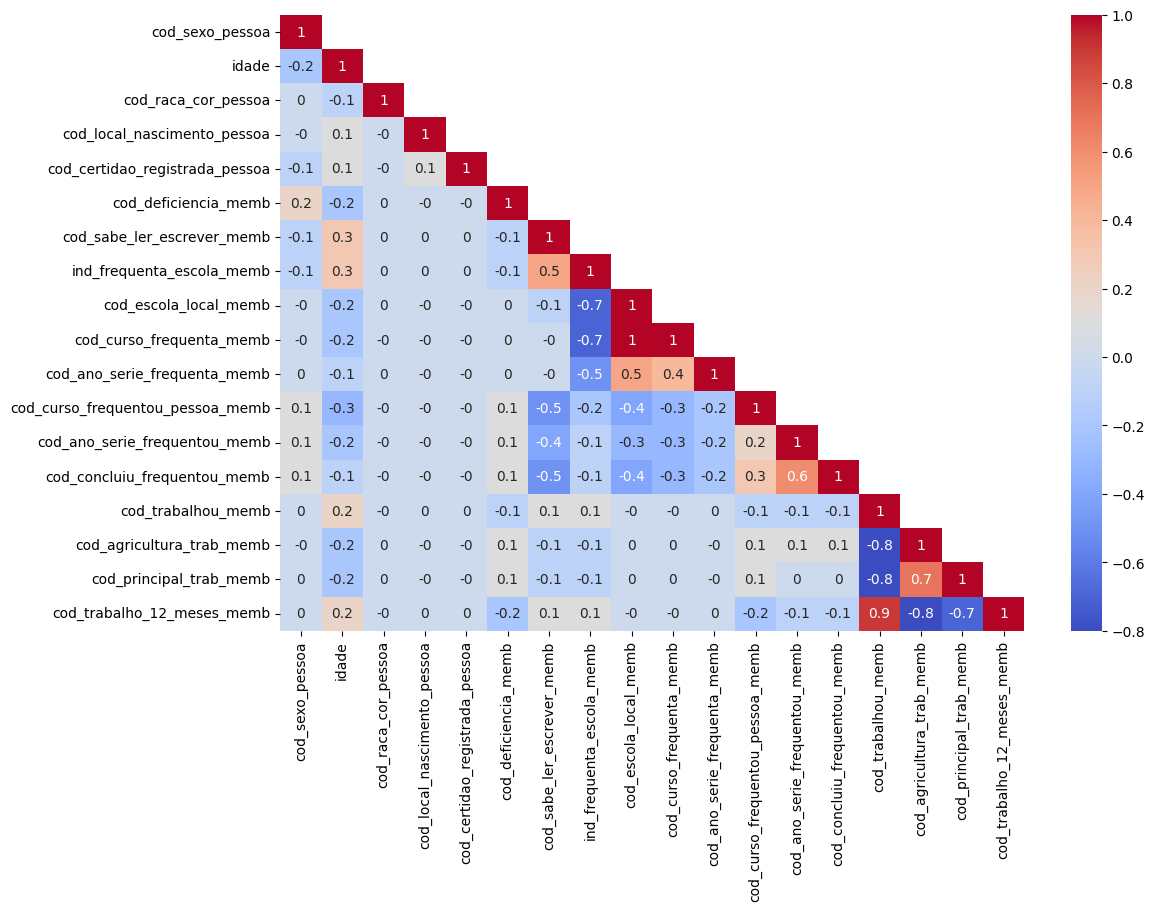

In [10]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_pessoas_final_rf[['cod_sexo_pessoa', 'idade',
      'cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb',
       'cod_principal_trab_memb', 'cod_trabalho_12_meses_memb']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [11]:
#Retirando features com correlação > 8
df_pessoas_final_rf = df_pessoas_final_rf.drop(columns=['cod_trabalho_12_meses_memb'])
                                               
df_pessoas_final_rf.head()

,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_curso_frequenta_memb,cod_ano_serie_frequenta_memb,cod_curso_frequentou_pessoa_memb,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,peso.pes,classe_renda
3,268503,10482075,2,38,1,1.0,2.0,1,2,1.0,...,-1.0,-1.0,4.0,4.0,1.0,1.0,1.0,6.0,563277716385694,0.0
5,2888440,8540843,2,27,1,4.0,1.0,1,2,1.0,...,-1.0,-1.0,8.0,1.0,2.0,2.0,-1.0,-1.0,563263195326236,0.0
7,2113517,2667228,2,46,1,4.0,1.0,1,2,1.0,...,-1.0,-1.0,4.0,4.0,1.0,1.0,2.0,6.0,563229587638739,2.0
9,4419096,4471735,2,34,1,1.0,1.0,1,2,1.0,...,-1.0,-1.0,8.0,3.0,1.0,2.0,-1.0,-1.0,563276393161791,0.0
10,4241219,7097369,2,56,1,4.0,2.0,1,2,1.0,...,-1.0,-1.0,5.0,6.0,2.0,2.0,-1.0,-1.0,56328235405831,0.0


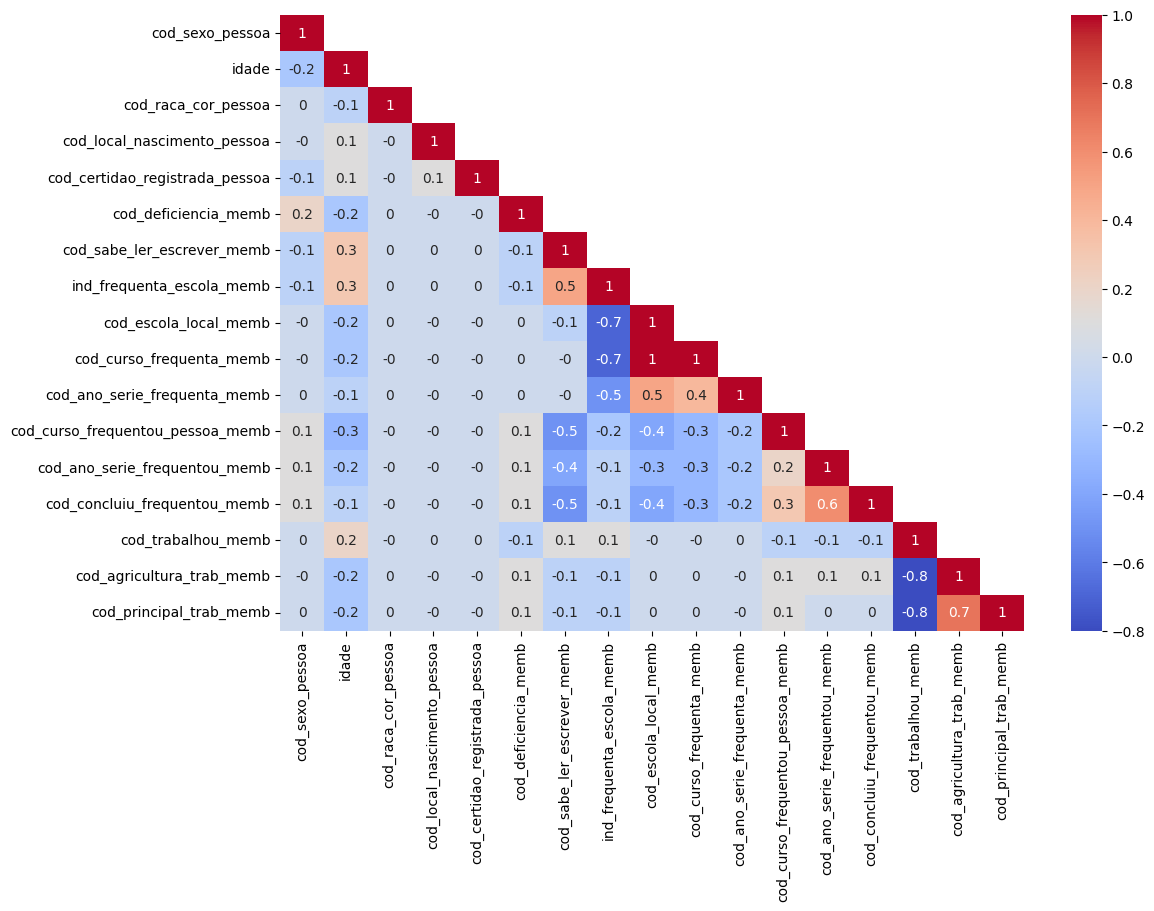

In [12]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_pessoas_final_rf[['cod_sexo_pessoa', 'idade',
      'cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb',
       'cod_principal_trab_memb']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

# Seleção das variáveis independentes (Features)

In [13]:
 df_pessoas_final_rf.columns

Index(['id_familia', 'id_pessoa', 'cod_sexo_pessoa', 'idade',
       'cod_parentesco_rf_pessoa', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb', 'cod_principal_trab_memb', 'peso.pes',
       'classe_renda'],
      dtype='object')

In [14]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_pessoas_final_rf[['cod_sexo_pessoa', 'idade',
       'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb', 'cod_principal_trab_memb']]
y = df_pessoas_final_rf['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96502, 17)


,cod_sexo_pessoa,idade,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,ind_frequenta_escola_memb,cod_escola_local_memb,cod_curso_frequenta_memb,cod_ano_serie_frequenta_memb,cod_curso_frequentou_pessoa_memb,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_agricultura_trab_memb,cod_principal_trab_memb
3,2,38,1.0,2.0,1,2,1.0,3.0,-1.0,-1.0,-1.0,4.0,4.0,1.0,1.0,1.0,6.0
5,2,27,4.0,1.0,1,2,1.0,3.0,-1.0,-1.0,-1.0,8.0,1.0,2.0,2.0,-1.0,-1.0
7,2,46,4.0,1.0,1,2,1.0,3.0,-1.0,-1.0,-1.0,4.0,4.0,1.0,1.0,2.0,6.0
9,2,34,1.0,1.0,1,2,1.0,3.0,-1.0,-1.0,-1.0,8.0,3.0,1.0,2.0,-1.0,-1.0
10,2,56,4.0,2.0,1,2,1.0,3.0,-1.0,-1.0,-1.0,5.0,6.0,2.0,2.0,-1.0,-1.0


In [15]:
y.head()

3     0.0
5     0.0
7     2.0
9     0.0
10    0.0
Name: classe_renda, dtype: float64

In [16]:
X.columns

Index(['cod_sexo_pessoa', 'idade', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb', 'cod_principal_trab_memb'],
      dtype='object')

In [17]:
import pandas as pd

# Definindo as colunas a serem analisadas
columns_to_check = [
    'cod_sexo_pessoa', 'idade', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb', 'cod_principal_trab_memb'
]

# Criando um dicionário para armazenar os tipos de resposta
response_types = {}

# Iterando sobre as colunas e coletando os valores únicos
for column in columns_to_check:
    response_types[column] = X[column].unique()

# Exibindo os tipos de resposta de cada coluna
for column, unique_values in response_types.items():
    print(f"Coluna: {column}\nValores únicos: {unique_values}\n")

Coluna: cod_sexo_pessoa
Valores únicos: [2 1]

Coluna: idade
Valores únicos: [ 38  27  46  34  56  79  74  18  33  26  22  36  21  72  23  32  42  28
  37  53  41  47  55  29  39  51  66  35  75  62  64  24  45  25  17  43
  54  63  44  20  52  71  80  69  58  49  19  40  76  30  15  82  50  67
  48  68  57  70  65  61  60  59  31  16  96  73 100  83  78  81  77  85
  90  91  84  88  98  87  14 107  89  86  97  95  93 130  92  94 121  99
 101 116]

Coluna: cod_raca_cor_pessoa
Valores únicos: [1. 4. 2. 3. 5.]

Coluna: cod_local_nascimento_pessoa
Valores únicos: [2. 1. 3.]

Coluna: cod_certidao_registrada_pessoa
Valores únicos: [1 2 3]

Coluna: cod_deficiencia_memb
Valores únicos: [2 1]

Coluna: cod_sabe_ler_escrever_memb
Valores únicos: [1. 2.]

Coluna: ind_frequenta_escola_memb
Valores únicos: [3. 2. 1. 4.]

Coluna: cod_escola_local_memb
Valores únicos: [-1.  1.  2.]

Coluna: cod_curso_frequenta_memb
Valores únicos: [-1.  9.  7. 10.  5.  4. 11. 13.  3.  8.  6.  1. 12. 14.]

Coluna: cod

In [18]:
#import pandas as pd
#from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import OneHotEncoder

In [19]:
#col_transf = make_column_transformer((OneHotEncoder(), ['regiao_ibge', 'estrato', 'classf', 'cod_local_domic_fam', 'cod_especie_domic_fam', 'cod_agua_canalizada_fam',
 #   'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam', 'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam', 'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
#  'cod_familia_indigena_fam', 'ind_familia_quilombola_fam']),
  #                                   remainder='passthrough')

In [20]:
#col_transf.fit_transform(X)

In [21]:
#col_transf.get_feature_names_out()

In [22]:
# Realizar a transformação e criar um DataFrame temporário com as colunas transformadas
#transformed_data = col_transf.fit_transform(X)
#transformed_columns = col_transf.get_feature_names_out()
#df_transformed = pd.DataFrame(transformed_data, columns=transformed_columns, index=X.index)

# Substituir as colunas de X pelas colunas transformadas
#X = df_transformed

In [23]:
X.head()

,cod_sexo_pessoa,idade,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,ind_frequenta_escola_memb,cod_escola_local_memb,cod_curso_frequenta_memb,cod_ano_serie_frequenta_memb,cod_curso_frequentou_pessoa_memb,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_agricultura_trab_memb,cod_principal_trab_memb
3,2,38,1.0,2.0,1,2,1.0,3.0,-1.0,-1.0,-1.0,4.0,4.0,1.0,1.0,1.0,6.0
5,2,27,4.0,1.0,1,2,1.0,3.0,-1.0,-1.0,-1.0,8.0,1.0,2.0,2.0,-1.0,-1.0
7,2,46,4.0,1.0,1,2,1.0,3.0,-1.0,-1.0,-1.0,4.0,4.0,1.0,1.0,2.0,6.0
9,2,34,1.0,1.0,1,2,1.0,3.0,-1.0,-1.0,-1.0,8.0,3.0,1.0,2.0,-1.0,-1.0
10,2,56,4.0,2.0,1,2,1.0,3.0,-1.0,-1.0,-1.0,5.0,6.0,2.0,2.0,-1.0,-1.0


In [24]:
y.head()

3     0.0
5     0.0
7     2.0
9     0.0
10    0.0
Name: classe_renda, dtype: float64

In [25]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Testando o modelo do tipo XGBClassifier

In [26]:
!pip install xgboost -q

In [27]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Mapeando as classes do target
y_train_mapped = y_train  

# Criar pipeline com normalização e modelo XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(objective='multi:softmax', num_class=3, random_state=42))
])

# Definir hiperparâmetros para o Grid Search
param_grid = {
    'xgb__n_estimators': [250, 300, 350],
    'xgb__max_depth': [2, 3, 4],
    'xgb__learning_rate': [0.1]
}

# Grid Search com validação cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train_mapped)  # Usando y_train_mapped

# Melhor modelo encontrado
gb_best = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# F1 score no conjunto de teste
y_test_mapped = y_test 
y_pred = gb_best.predict(X_test)
f1 = f1_score(y_test_mapped, y_pred, average='macro')  # Calcular F1 score para multiclasse
print(f"F1 Score: {f1:.2f}")

Melhores hiperparâmetros: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__n_estimators': 350}
F1 Score: 0.59


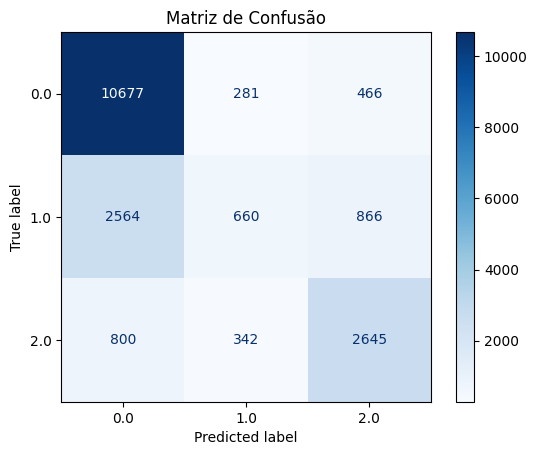

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gerar e exibir a matriz de confusão diretamente a partir do estimador
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test, cmap='Blues')
# Personalizar o gráfico
plt.title('Matriz de Confusão')
plt.show()

In [29]:
from sklearn.inspection import permutation_importance

In [30]:
# 7- Importância das features por permutação
# Obter o melhor modelo treinado do GridSearchCV
best_model = grid_search.best_estimator_

In [31]:
# Calcular a importância das features por permutação
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

In [32]:
# Obter as importâncias médias e o desvio padrão das importâncias
importances_mean = perm_importance.importances_mean
importances_std = perm_importance.importances_std
features = X_test.columns

In [33]:
# Obter as importâncias médias e o desvio padrão das importâncias
importance_vals = perm_importance.importances_mean
importance_std = perm_importance.importances_std
features = X_test.columns

In [34]:
# Ordenar as importâncias em ordem decrescente
indices = np.argsort(importance_vals)[::-1]

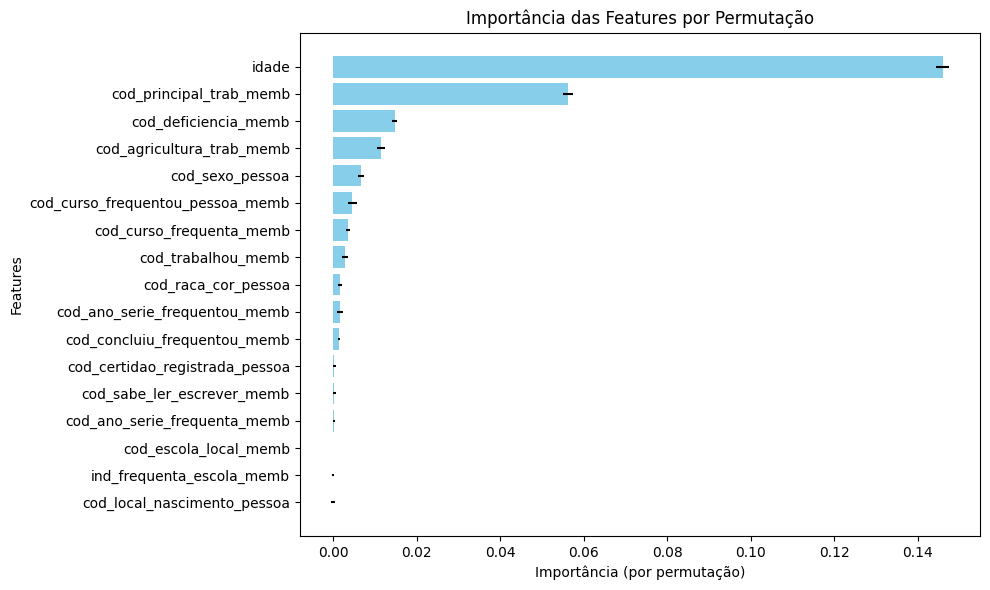

In [35]:
# Plotar a importância das features na horizontal com desvio padrão
plt.figure(figsize=(10, 6))
plt.title("Importância das Features por Permutação")
plt.barh(range(len(importance_vals)), importance_vals[indices], xerr=importance_std[indices], align="center", color='skyblue')
plt.yticks(range(len(importance_vals)), features[indices])
plt.gca().invert_yaxis()  # Inverter o eixo Y para que a feature mais importante fique no topo
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [36]:
# Criar uma lista de tuplas com a importância, desvio padrão e o nome da feature
feature_importance = list(zip(features, importance_vals, importance_std))

# Ordenar pela importância de forma decrescente
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Exibir a lista de importância das features
print("Importância das Features por Permutação:")
for feature, importance, std in feature_importance:
    print(f"Feature: {feature}, Importância: {importance:.4f}, Desvio Padrão: {std:.4f}")

Importância das Features por Permutação:
Feature: idade, Importância: 0.1460, Desvio Padrão: 0.0015
Feature: cod_principal_trab_memb, Importância: 0.0563, Desvio Padrão: 0.0011
Feature: cod_deficiencia_memb, Importância: 0.0148, Desvio Padrão: 0.0006
Feature: cod_agricultura_trab_memb, Importância: 0.0115, Desvio Padrão: 0.0009
Feature: cod_sexo_pessoa, Importância: 0.0066, Desvio Padrão: 0.0007
Feature: cod_curso_frequentou_pessoa_memb, Importância: 0.0046, Desvio Padrão: 0.0010
Feature: cod_curso_frequenta_memb, Importância: 0.0036, Desvio Padrão: 0.0006
Feature: cod_trabalhou_memb, Importância: 0.0028, Desvio Padrão: 0.0007
Feature: cod_raca_cor_pessoa, Importância: 0.0017, Desvio Padrão: 0.0004
Feature: cod_ano_serie_frequentou_memb, Importância: 0.0017, Desvio Padrão: 0.0008
Feature: cod_concluiu_frequentou_memb, Importância: 0.0014, Desvio Padrão: 0.0003
Feature: cod_certidao_registrada_pessoa, Importância: 0.0004, Desvio Padrão: 0.0004
Feature: cod_sabe_ler_escrever_memb, Import

In [37]:
# 7. Criar um DataFrame com as importâncias
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
})

# 8. Filtrar as features com importância maior que zero
important_features = importance_df[importance_df['Importance'] > 0.001]

print("Features com importância maior que zero:")
print(important_features)

# 9. Selecionar apenas as colunas importantes no conjunto de dados
X_train_filtered = X_train[important_features['Feature']]
X_test_filtered = X_test[important_features['Feature']]

# Grid Search com validação cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_filtered, y_train)

# Melhor modelo encontrado
gb_best = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")
# F1 score
y_pred = gb_best.predict(X_test_filtered)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

Features com importância maior que zero:
                             Feature  Importance
0                    cod_sexo_pessoa    0.006616
1                              idade    0.145972
2                cod_raca_cor_pessoa    0.001684
5               cod_deficiencia_memb    0.014808
9           cod_curso_frequenta_memb    0.003627
11  cod_curso_frequentou_pessoa_memb    0.004632
12     cod_ano_serie_frequentou_memb    0.001673
13      cod_concluiu_frequentou_memb    0.001435
14                cod_trabalhou_memb    0.002808
15         cod_agricultura_trab_memb    0.011518
16           cod_principal_trab_memb    0.056267


C:\Users\Admin\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Melhores hiperparâmetros: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 2, 'xgb__n_estimators': 250}
F1 Score: 0.58


# Testando o modelo Árvore de decisão

In [38]:
# Importando as bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# Filtrar as features com importância maior que 0.001
important_features = importance_df[importance_df['Importance'] > 0.001]['Feature'].tolist()


In [40]:
# Selecionar apenas as important_features do df_pessoas_final_rf
X = df_pessoas_final_rf[important_features]
y = df_pessoas_final_rf['classe_renda']  # Variável target (supõe-se que seja 'classe_renda')

In [41]:
# Dividir os dados em treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Criar e treinar o modelo de Árvore de Decisão
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [43]:
# Fazer previsões nos dados de teste
y_pred = decision_tree.predict(X_test)

In [44]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.6985

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82     17020
         1.0       0.47      0.14      0.21      6193
         2.0       0.63      0.62      0.63      5738

    accuracy                           0.70     28951
   macro avg       0.61      0.56      0.55     28951
weighted avg       0.66      0.70      0.65     28951



In [45]:
# Importância das features utilizadas pelo modelo
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [46]:
print("\nImportância das Features no Modelo de Árvore de Decisão:")
print(feature_importances)


Importância das Features no Modelo de Árvore de Decisão:
                             Feature  Importance
1                              idade    0.689136
10           cod_principal_trab_memb    0.224221
3               cod_deficiencia_memb    0.081832
8                 cod_trabalhou_memb    0.004811
0                    cod_sexo_pessoa    0.000000
2                cod_raca_cor_pessoa    0.000000
4           cod_curso_frequenta_memb    0.000000
5   cod_curso_frequentou_pessoa_memb    0.000000
6      cod_ano_serie_frequentou_memb    0.000000
7       cod_concluiu_frequentou_memb    0.000000
9          cod_agricultura_trab_memb    0.000000


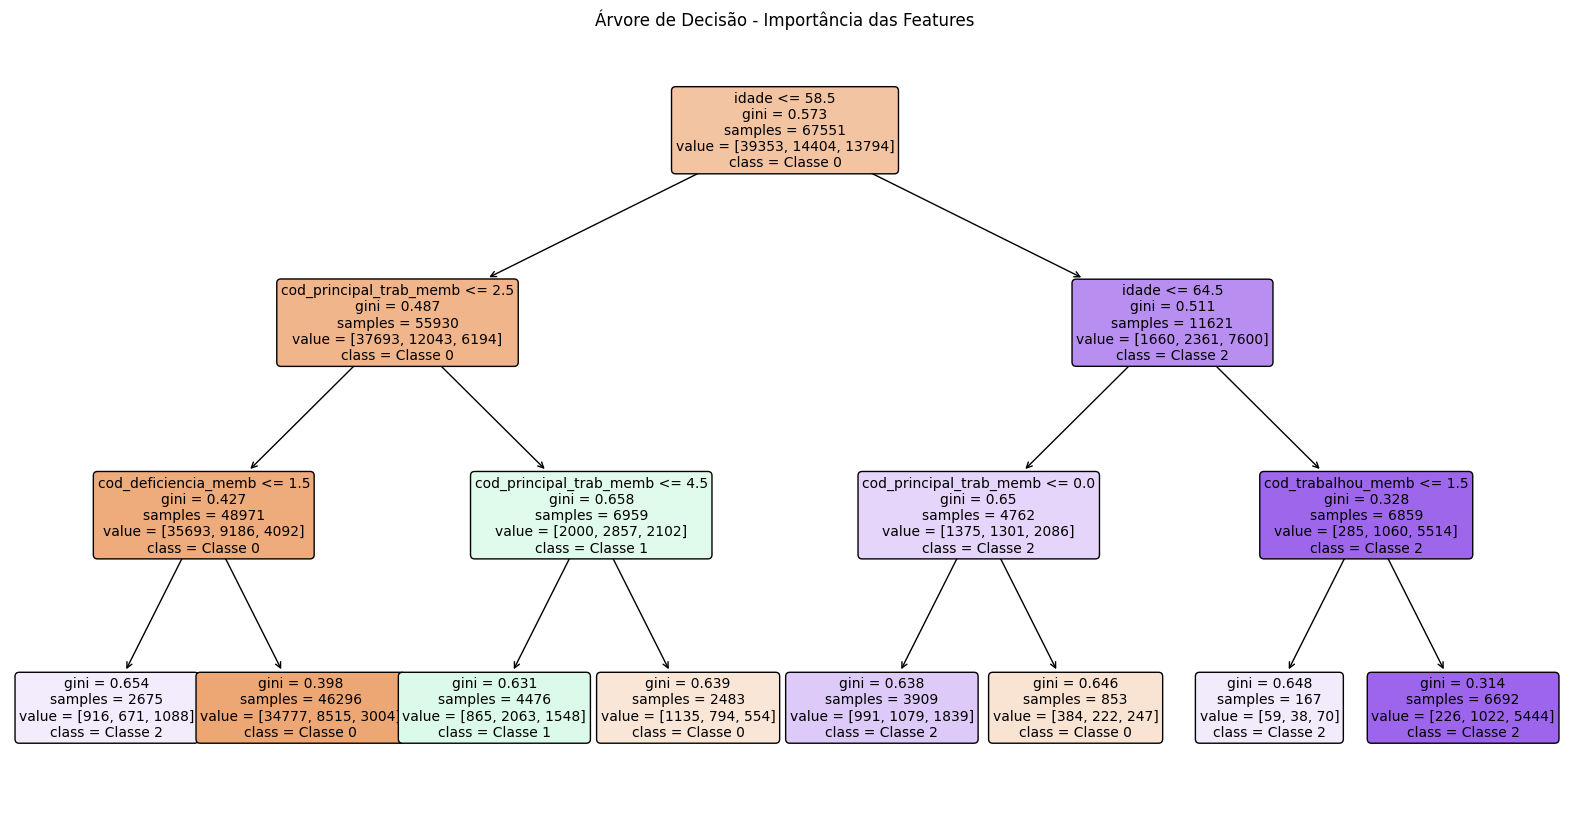

In [47]:
# Plotar a Árvore de Decisão
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree, 
    feature_names=X.columns, 
    class_names=['Classe 0', 'Classe 1', 'Classe 2'],  # Substitua pelos nomes das classes reais, se necessário
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Árvore de Decisão - Importância das Features")
plt.show()

# Testando o modelo RandomForest

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Filtrar as features com importância maior que 0.001
important_features = importance_df[importance_df['Importance'] > 0.001]['Feature'].tolist()


In [50]:
# Selecionar apenas as important_features do df_pessoas_final_rf
X = df_pessoas_final_rf[important_features]
y = df_pessoas_final_rf['classe_renda']  # Variável target (supõe-se que seja 'classe_renda')

In [51]:
# Dividir os dados em treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# Criar e treinar o modelo Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, n_jobs=-1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [53]:
# Fazer previsões nos dados de teste
y_pred = random_forest.predict(X_test)

In [54]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.7152

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83     17020
         1.0       0.50      0.15      0.23      6193
         2.0       0.66      0.67      0.67      5738

    accuracy                           0.72     28951
   macro avg       0.64      0.59      0.58     28951
weighted avg       0.68      0.72      0.67     28951



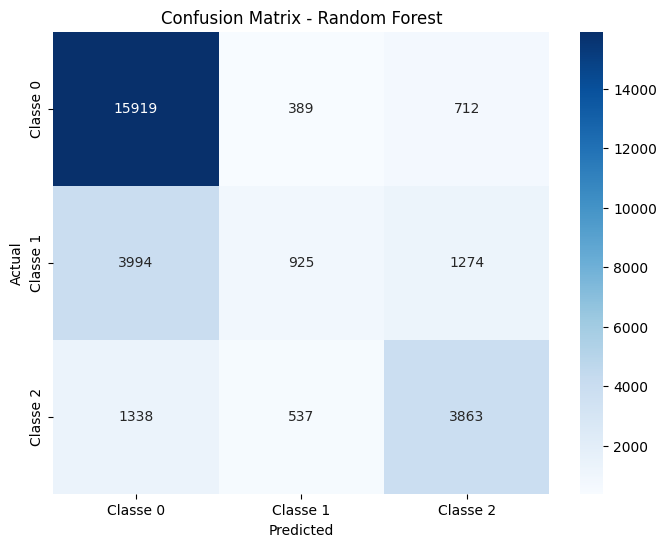

In [55]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1', 'Classe 2'], 
            yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [56]:
# Importância das features utilizadas pelo modelo
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [57]:
print("\nImportância das Features no Modelo Random Forest:")
print(feature_importances)


Importância das Features no Modelo Random Forest:
                             Feature  Importance
1                              idade    0.532124
10           cod_principal_trab_memb    0.179046
3               cod_deficiencia_memb    0.060699
5   cod_curso_frequentou_pessoa_memb    0.047890
9          cod_agricultura_trab_memb    0.040899
0                    cod_sexo_pessoa    0.035509
2                cod_raca_cor_pessoa    0.026796
6      cod_ano_serie_frequentou_memb    0.024538
4           cod_curso_frequenta_memb    0.018300
8                 cod_trabalhou_memb    0.017352
7       cod_concluiu_frequentou_memb    0.016847


# Avaliando o balanceamento das classes

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Verificar a distribuição da variável target
target_distribution = df_pessoas_final_rf['classe_renda'].value_counts(normalize=True)

In [60]:
print("Distribuição da variável target 'classe_renda':")
print(target_distribution)

Distribuição da variável target 'classe_renda':
classe_renda
0.0    0.584164
1.0    0.213436
2.0    0.202400
Name: proportion, dtype: float64


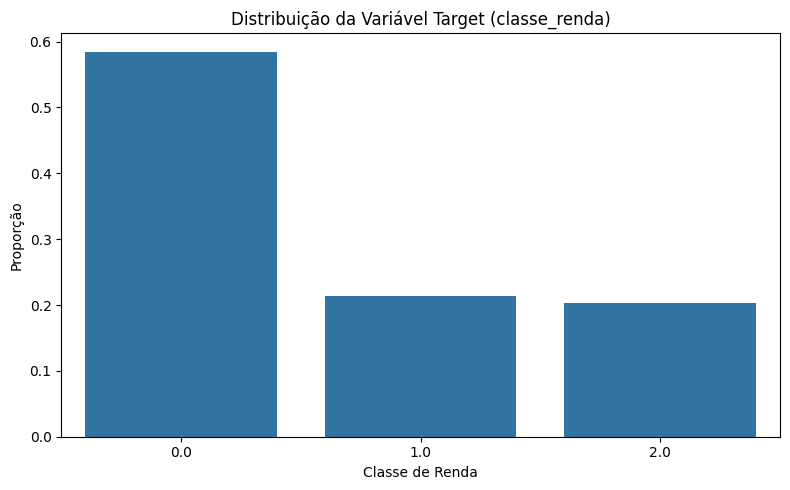

In [61]:
# Plotar a distribuição da variável target
plt.figure(figsize=(8, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda)')
plt.xlabel('Classe de Renda')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [62]:
# Exibir o número absoluto de ocorrências por classe
absolute_distribution = df_pessoas_final_rf['classe_renda'].value_counts()

print("\nNúmero absoluto de ocorrências por classe:")
print(absolute_distribution)


Número absoluto de ocorrências por classe:
classe_renda
0.0    56373
1.0    20597
2.0    19532
Name: count, dtype: int64


In [63]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Separar as features (X) e a variável target (y)
X = df_pessoas_final_rf.drop(columns=['classe_renda'])
y = df_pessoas_final_rf['classe_renda']

In [66]:
# Primeiro, aplica-se o SMOTE para criar amostras sintéticas das classes minoritárias
# Depois, faz-se undersampling para reduzir a classe majoritária a um tamanho mais equilibrado
over = SMOTE(sampling_strategy={1.0: 35000, 2.0: 35000})  # Aumenta as classes 1 e 2 para 35k cada
under = RandomUnderSampler(sampling_strategy={0.0: 40000})  # Reduz a classe 0 para 40k

In [67]:
# Criar um pipeline que aplica SMOTE e depois o undersampling
pipeline = Pipeline(steps=[('o', over), ('u', under)])

In [68]:
# Aplicar o balanceamento ao conjunto de dados
X_balanced, y_balanced = pipeline.fit_resample(X, y)

In [69]:
# Verificar a nova distribuição das classes
balanced_distribution = pd.Series(y_balanced).value_counts()

print("Distribuição da variável target 'classe_renda' após o balanceamento:")
print(balanced_distribution)

Distribuição da variável target 'classe_renda' após o balanceamento:
classe_renda
0.0    40000
1.0    35000
2.0    35000
Name: count, dtype: int64


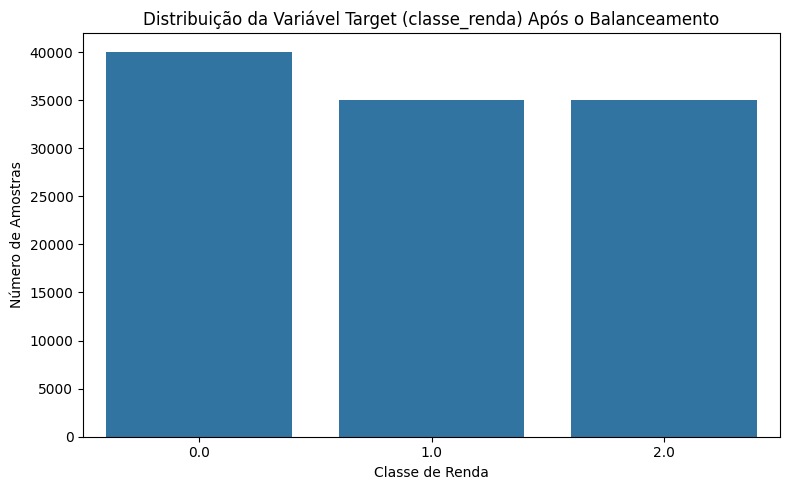

In [70]:
# Visualizar a distribuição das classes após o balanceamento
plt.figure(figsize=(8, 5))
sns.barplot(x=balanced_distribution.index, y=balanced_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda) Após o Balanceamento')
plt.xlabel('Classe de Renda')
plt.ylabel('Número de Amostras')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Resumindo o resultado de todos os modelos

In [71]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [72]:
# Modelos treinados e os respectivos conjuntos de teste e predições

models = {'XGBoost with Grid Search': gb_best, 
          'RandomForestClassifier': random_forest, 
          'DecisionTreeClassifier': decision_tree}
#y_test: Variável de target de teste
predictions = {'XGBoost with Grid Search': y_pred, 'RandomForestClassifier': y_pred, 'DecisionTreeClassifier': y_pred}

In [73]:
# Dicionário para armazenar as métricas dos modelos
model_scores = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [74]:

# Avaliar cada modelo e armazenar as métricas
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Adicionar o nome do modelo e as respectivas métricas
    model_scores['Model'].append(model_name)
    model_scores['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_scores['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    model_scores['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    model_scores['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))


# Criar um DataFrame para organizar os resultados
scores_df = pd.DataFrame(model_scores)

# Mostrar o resumo dos scores
print("Resumo dos Scores dos Modelos:")
print(scores_df)

Resumo dos Scores dos Modelos:
                      Model  Accuracy  Precision    Recall  F1 Score
0  XGBoost with Grid Search  0.716901   0.683373  0.716901  0.669371
1    RandomForestClassifier  0.715243   0.678184  0.715243  0.670422
2    DecisionTreeClassifier  0.698491   0.658613  0.698491  0.652493


In [79]:
# Avaliando as features mais importantes para cada modelo

# Dicionário para armazenar as importâncias das features
feature_importances_dict = {}

# Avaliar a importância das features para cada modelo
for model_name, model in models.items():
    print(f"\nAvaliação do modelo: {model_name}")
    
    # Avaliar a importância das features usando permutação
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Criar um DataFrame com as importâncias
    importance_df = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': result.importances_mean,
        'Std': result.importances_std
    })

    # Ordenar pela importância de forma decrescente
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Exibir as 5 principais features
    top_features = importance_df.head(5)
    print("\nImportância das Features por Permutação:")
    for index, row in top_features.iterrows():
        print(f"Feature: {row['Feature']}, Importância: {row['Importance']:.4f}, Desvio Padrão: {row['Std']:.4f}")

    # Armazenar as importâncias no dicionário
    feature_importances_dict[model_name] = top_features


Avaliação do modelo: XGBoost with Grid Search

Importância das Features por Permutação:
Feature: idade, Importância: 0.1492, Desvio Padrão: 0.0016
Feature: cod_principal_trab_memb, Importância: 0.0571, Desvio Padrão: 0.0006
Feature: cod_deficiencia_memb, Importância: 0.0087, Desvio Padrão: 0.0004
Feature: cod_agricultura_trab_memb, Importância: 0.0086, Desvio Padrão: 0.0006
Feature: cod_sexo_pessoa, Importância: 0.0062, Desvio Padrão: 0.0006

Avaliação do modelo: RandomForestClassifier

Importância das Features por Permutação:
Feature: idade, Importância: 0.1361, Desvio Padrão: 0.0015
Feature: cod_principal_trab_memb, Importância: 0.0505, Desvio Padrão: 0.0010
Feature: cod_deficiencia_memb, Importância: 0.0134, Desvio Padrão: 0.0004
Feature: cod_agricultura_trab_memb, Importância: 0.0085, Desvio Padrão: 0.0005
Feature: cod_sexo_pessoa, Importância: 0.0068, Desvio Padrão: 0.0007

Avaliação do modelo: DecisionTreeClassifier

Importância das Features por Permutação:
Feature: idade, Impor